# 3. MapReduce

For this exercise we are going to use MapReduce in local mode, i.e. we won't be running anything on the cluster!
 
## 3.1. Use the commands `head`, `cat`, `uniq`, `wc`, `sort`, `find`, `xargs`, `awk` to evaluate the NASA log file:

* Data File:  <https://github.com/scalable-infrastructure/exercise-2018/blob/master/data/nasa/NASA_access_log_Jul95.gz>
* Which page was called the most?
* What was the most frequent return code?
* How many errors occurred? What is the percentage of errors?


In [1]:
import os, sys
os.chdir(os.path.join(os.environ["HOME"], "exercise-students-2020/03_MapReduce"))
%pwd

'/home/jupyter-filipiuk-12151613/exercise-students-2020/03_MapReduce'

In [2]:
!head /opt/data/nasa/NASA_access_log_Jul95

199.72.81.55 - - [01/Jul/1995:00:00:01 -0400] "GET /history/apollo/ HTTP/1.0" 200 6245
unicomp6.unicomp.net - - [01/Jul/1995:00:00:06 -0400] "GET /shuttle/countdown/ HTTP/1.0" 200 3985
199.120.110.21 - - [01/Jul/1995:00:00:09 -0400] "GET /shuttle/missions/sts-73/mission-sts-73.html HTTP/1.0" 200 4085
burger.letters.com - - [01/Jul/1995:00:00:11 -0400] "GET /shuttle/countdown/liftoff.html HTTP/1.0" 304 0
199.120.110.21 - - [01/Jul/1995:00:00:11 -0400] "GET /shuttle/missions/sts-73/sts-73-patch-small.gif HTTP/1.0" 200 4179
burger.letters.com - - [01/Jul/1995:00:00:12 -0400] "GET /images/NASA-logosmall.gif HTTP/1.0" 304 0
burger.letters.com - - [01/Jul/1995:00:00:12 -0400] "GET /shuttle/countdown/video/livevideo.gif HTTP/1.0" 200 0
205.212.115.106 - - [01/Jul/1995:00:00:12 -0400] "GET /shuttle/countdown/countdown.html HTTP/1.0" 200 3985
d104.aa.net - - [01/Jul/1995:00:00:13 -0400] "GET /shuttle/countdown/ HTTP/1.0" 200 3985
129.94.144.152 - - [01/Jul/1995:00:00:13 -0400] "GET / HTTP/1.0" 

In [3]:
#Which page was called the most? (Answer: number_of_calls, website)
!awk '{print $1}' /opt/data/nasa/NASA_access_log_Jul95 | sort -n | uniq -c | sort -nr | head -n 1

  17572 piweba3y.prodigy.com
sort: write failed: 'standard output': Broken pipe
sort: write error


In [4]:
#What was the most frequent return code? (Answer: number_of_code, code)
! awk '{print $(NF-1)}' /opt/data/nasa/NASA_access_log_Jul95 | sort -n | uniq -c | sort -nr | head -n 1

1701534 200


In [5]:
#How many errors occurred? What is the percentage of errors?
!x="$(wc -l /opt/data/nasa/NASA_access_log_Jul95 | awk '{print $1}') $(awk '$(NF-1) >= 400 {print $(NF-1)}' /opt/data/nasa/NASA_access_log_Jul95 | wc -l)"; echo $x | awk '{print "Total num of errors: " $2}'; echo $x | awk '{print "Error percentage: "($2 / ($1) * 100) "%"}'

Total num of errors: 10981
Error percentage: 0.580479%


## 3.2 Implement a Python version of this Unix Shell script using this script as template! Run the Python script inside an Hadoop Streaming job.

Template: <https://github.com/scalable-infrastructure/scalable-infrastructure.github.io/blob/master/src/map_reduce.py>

In [6]:
import os
TMP_DIR=os.path.join(os.getcwd(), "tmp")
os.environ["HADOOP_HOME"]="/opt/hadoop-2.8.5"
os.environ["JAVA_HOME"]="/usr"
os.environ["JAVA_OPTS"]="-Djava.io.tmpdir="+TMP_DIR
os.environ["HADOOP_OPTS"]="-Djava.io.tmpdir="+TMP_DIR
os.environ["PATH"]=os.path.join(os.environ["HADOOP_HOME"], "bin") + ":"+os.environ["PATH"]

In [7]:
!hadoop jar ${HADOOP_HOME}/share/hadoop/tools/lib/hadoop-streaming-2.8.5.jar -info

Usage: $HADOOP_PREFIX/bin/hadoop jar hadoop-streaming.jar [options]
Options:
  -input          <path> DFS input file(s) for the Map step.
  -output         <path> DFS output directory for the Reduce step.
  -mapper         <cmd|JavaClassName> Optional. Command to be run as mapper.
  -combiner       <cmd|JavaClassName> Optional. Command to be run as combiner.
  -reducer        <cmd|JavaClassName> Optional. Command to be run as reducer.
  -file           <file> Optional. File/dir to be shipped in the Job jar file.
                  Deprecated. Use generic option "-files" instead.
  -inputformat    <TextInputFormat(default)|SequenceFileAsTextInputFormat|JavaClassName>
                  Optional. The input format class.
  -outputformat   <TextOutputFormat(default)|JavaClassName>
                  Optional. The output format class.
  -partitioner    <JavaClassName>  Optional. The partitioner class.
  -numReduceTasks <num> Optional. Number of reduce tasks.
  -inputreader    <spec> Optional. 

In [8]:
!cat /opt/data/nasa/NASA_access_log_Jul95| python map_reduce.py map | sort | python map_reduce.py reduce

error	10980
ok	1880734


In [9]:
!hadoop jar ${HADOOP_HOME}/share/hadoop/tools/lib/hadoop-streaming-2.8.5.jar -files map_reduce.py -input /opt/data/nasa/ -mapper 'map_reduce.py map' -reducer 'map_reduce.py reduce' -output output_nasa > /dev/null 2>&1 

---

## 3.3 Run the program Terasort on 1 GB of data - each record that TeraGen generates is 100 Bytes in size:

    hadoop jar ${HADOOP_HOME}/share/hadoop/mapreduce/hadoop-mapreduce-examples-2.7.5.jar teragen <number_of_records> <output_directory>

    hadoop jar ${HADOOP_HOME}/share/hadoop/mapreduce/hadoop-mapreduce-examples-2.7.5.jar terasort <input_directory> <output_directory>
    
    hadoop jar ${HADOOP_HOME}/share/hadoop/mapreduce/hadoop-mapreduce-examples-2.7.5.jar teravalidate <input_directory> <output_directory>

Measure the runtime for each step and plot the results! 

In [10]:
%%time
!hadoop jar ${HADOOP_HOME}/share/hadoop/mapreduce/hadoop-mapreduce-examples-2.8.5.jar teragen 10000000 teragen_out > /dev/null 2>&1

CPU times: user 220 ms, sys: 52.1 ms, total: 272 ms
Wall time: 12.5 s


In [11]:
%%time
!hadoop jar ${HADOOP_HOME}/share/hadoop/mapreduce/hadoop-mapreduce-examples-2.8.5.jar terasort teragen_out/ terasort_out  > /dev/null 2>&1

CPU times: user 859 ms, sys: 143 ms, total: 1 s
Wall time: 50.1 s


In [12]:
%%time
!hadoop jar ${HADOOP_HOME}/share/hadoop/mapreduce/hadoop-mapreduce-examples-2.8.5.jar teravalidate terasort_out teravalidate_out > /dev/null 2>&1

CPU times: user 121 ms, sys: 48 ms, total: 169 ms
Wall time: 6.53 s


In [13]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

columns = ['user', 'sys', 'total', 'wall']
teragen = np.array([220, 52.1, 272, 12500])
terasort = np.array([859, 143, 1000, 50100])
teravalidate = np.array([121, 48, 169, 6530])

df = pd.DataFrame(np.stack([teragen, terasort, teravalidate]), columns=columns, index=['teragen', 'terasort', 'teravalidate'])

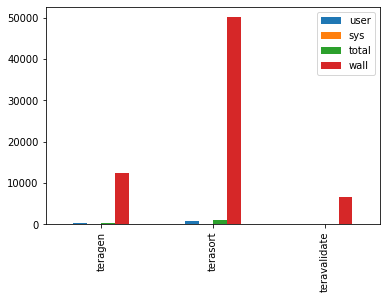

In [14]:
df.plot.bar()